In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error



csv_file = 'C:\\Users\\Lenovo\\Downloads\\pendulum_data.csv' 
df = pd.read_csv(csv_file)

theta = df['theta'].values 
theta_dot = df['theta_dot'].values  
theta_double_dot = df['theta_double_dot'].values
df['sin_theta'] = np.sin(df['theta'])
df['theta_dot_squared']= df['theta_dot']**2

X = df[['theta', 'theta_dot','sin_theta','theta_dot_squared','theta_double_dot']]
y = df['theta_double_dot']


correlation_matrix = X.corr()

print(correlation_matrix)

                      theta  theta_dot  sin_theta  theta_dot_squared  \
theta              1.000000  -0.045452   0.998554          -0.006074   
theta_dot         -0.045452   1.000000  -0.046386           0.048752   
sin_theta          0.998554  -0.046386   1.000000          -0.005369   
theta_dot_squared -0.006074   0.048752  -0.005369           1.000000   
theta_double_dot  -0.940972   0.061377  -0.940533          -0.005858   

                   theta_double_dot  
theta                     -0.940972  
theta_dot                  0.061377  
sin_theta                 -0.940533  
theta_dot_squared         -0.005858  
theta_double_dot           1.000000  


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

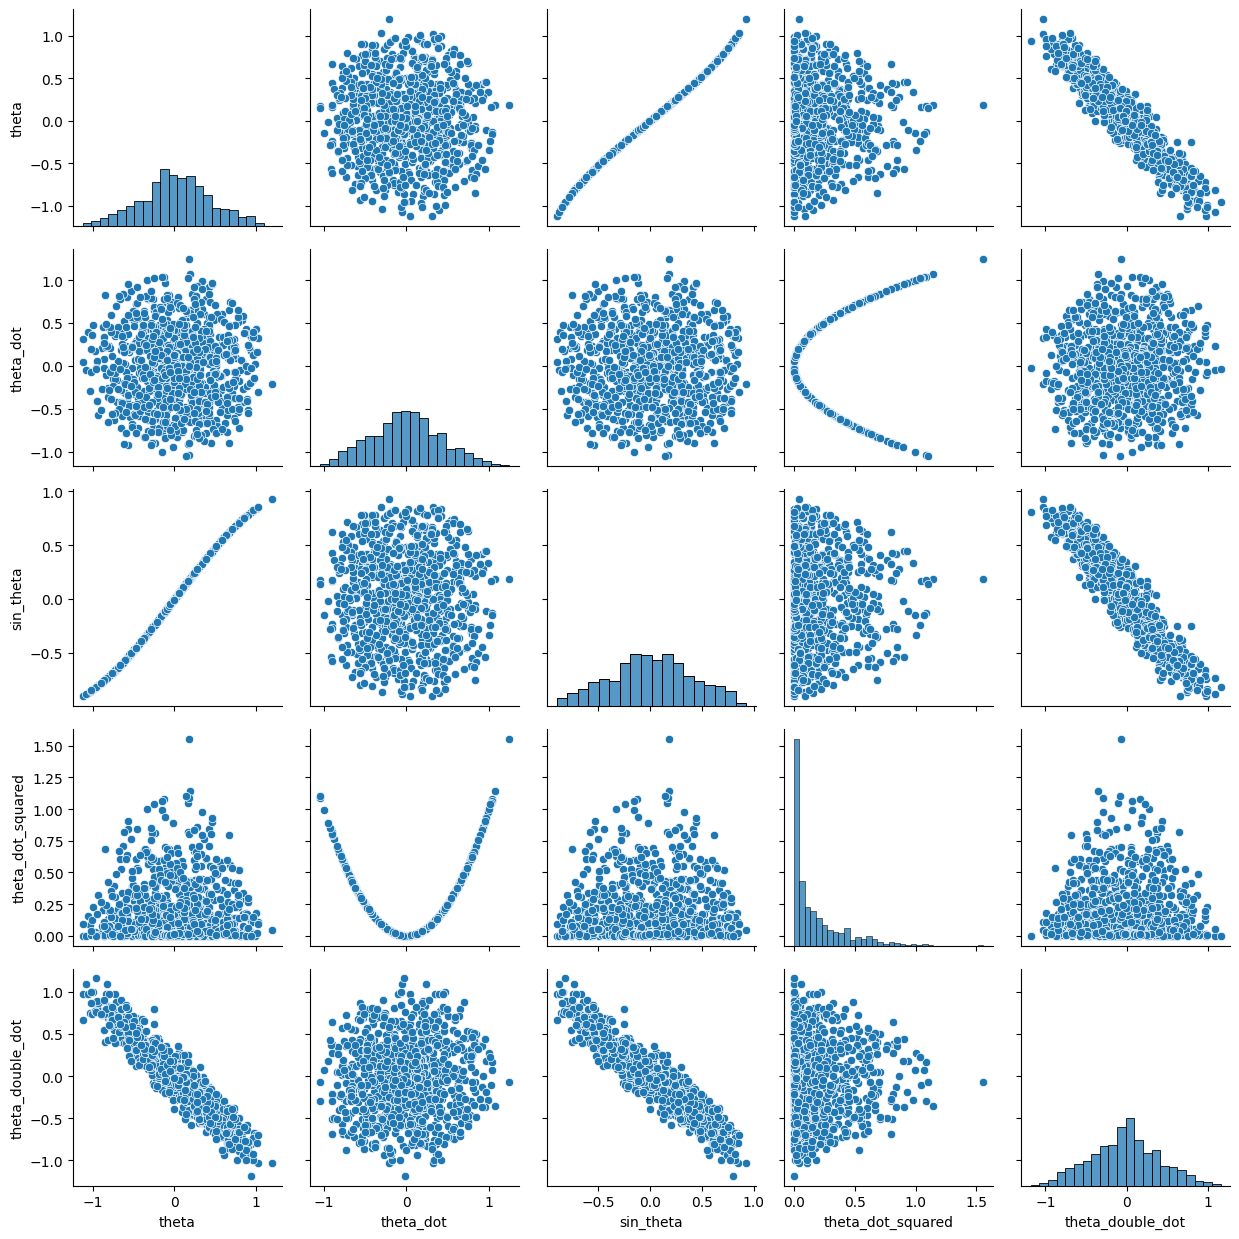

In [7]:
sns.pairplot(X)
figure = 'Graphs depicting relation of various metrics with each other.png'
plt.tight_layout()
plt.savefig(figure, dpi=300)
plt.show()

In [8]:
# X = df[['theta', 'theta_dot', 'sin_theta', 'theta_dot_squared']]
y = df['theta_double_dot']
theta_dot_squared= df['theta_dot_squared'].values
sin_theta=np.sin(theta)

X1=pd.DataFrame({'theta':theta, 'sin_theta': sin_theta, 'theta_dot': theta_dot, 'theta_dot_squared': theta_dot_squared})

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42)

alphas1 = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
best_alpha = [0,0]
best_mse = float('inf')

for alpha in alphas1:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train1, y_train1, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha[0]=best_alpha[1]
        best_alpha[1] = alpha

print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: [0.1, 1]
Average Train MSE with Best Alpha: 0.019819681482595487


In [10]:
alphas2 = np.linspace(0,10,1000)
best_alpha = None
best_mse = float('inf')

for alpha in alphas2:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train1, y_train1, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha = alpha
        
print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: 1.0710710710710711
Average Train MSE with Best Alpha: 0.019819639074821795


[-0.48743663 -0.4610855   0.03042041 -0.03738539]
Mean Squared Error (MSE): 0.020570023796071014


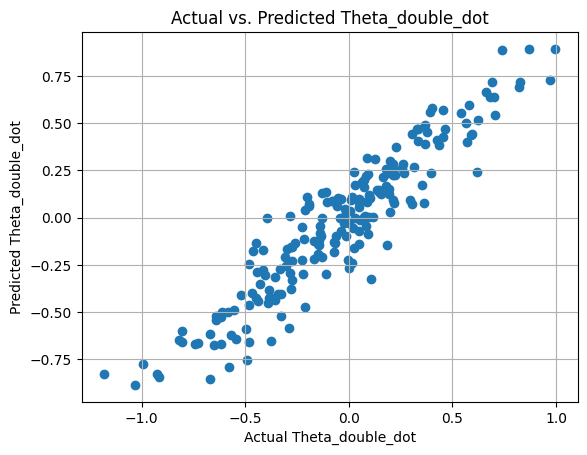

In [11]:
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train1, y_train1)

y_pred1 = ridge.predict(X_test1)


mse = mean_squared_error(y_test1, y_pred1)

print(ridge.coef_)
print(f"Mean Squared Error (MSE): {mse}")

plt.scatter(y_test1, y_pred1)
plt.xlabel('Actual Theta_double_dot')
plt.ylabel('Predicted Theta_double_dot')
plt.title('Actual vs. Predicted Theta_double_dot')
plt.grid(True)

plt.show()

$$
\ddot{\theta} = -0.48743663 {\theta} -0.4610855 {\sin{\theta}}+ 0.03042041{\dot{\theta}} -0.03738539{{\dot{\theta}}}^2
$$

In [13]:
X2 = df[['theta', 'sin_theta']]
y = df['theta_double_dot']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)

alphas3 = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
best_alpha = [0,0]
best_mse = float('inf')

for alpha in alphas3:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha[0]=best_alpha[1]
        best_alpha[1] = alpha


print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: [0.1, 1]
Average Train MSE with Best Alpha: 0.01998722415727134


In [14]:
alphas4 = np.linspace(0,10,1000)
best_alpha = None
best_mse = float('inf')

for alpha in alphas4:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha = alpha
        

print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: 1.0710710710710711
Average Train MSE with Best Alpha: 0.019987180382144663


[-0.48690472 -0.46376468]
Mean Squared Error (MSE): 0.0198884341214559


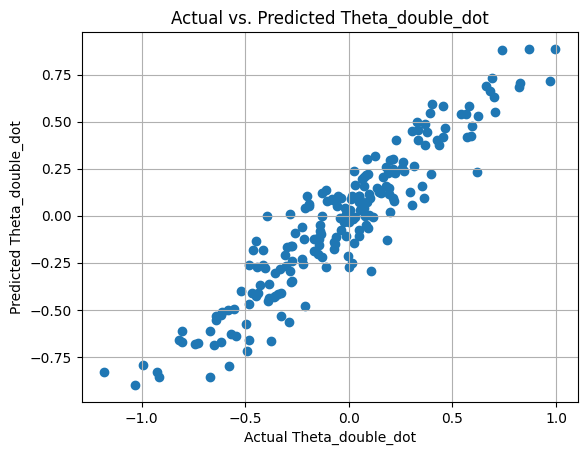

In [15]:
ridge1 = Ridge(alpha=best_alpha)
ridge1.fit(X_train2, y_train2)

y_pred2 = ridge1.predict(X_test2)


mse = mean_squared_error(y_test2, y_pred2)

print(ridge1.coef_)
print(f"Mean Squared Error (MSE): {mse}")

plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Theta_double_dot')
plt.ylabel('Predicted Theta_double_dot')
plt.title('Actual vs. Predicted Theta_double_dot')
plt.grid(True)

plt.show()

$$
\ddot{\theta} = -0.48690472 {\theta} -0.46376468 {\sin{\theta}}
$$

In [19]:
X3 = df[['theta']]
y = df['theta_double_dot']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42)

alphas = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
best_alpha = [0,0]
best_mse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha[0]=best_alpha[1]
        best_alpha[1] = alpha


print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: [0, 1e-07]
Average Train MSE with Best Alpha: 0.020091358884397878


In [20]:
alphas = np.linspace(0,10,1000)
best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    average_mse = np.mean(mse_scores)

    if average_mse < best_mse:
        best_mse = average_mse
        best_alpha = alpha
        

print(f"Best Alpha: {best_alpha}")
print(f"Average Train MSE with Best Alpha: {best_mse}")


Best Alpha: 0.0
Average Train MSE with Best Alpha: 0.020091358884354378


[-0.91630447]
Mean Squared Error (MSE): 0.019651053950790948


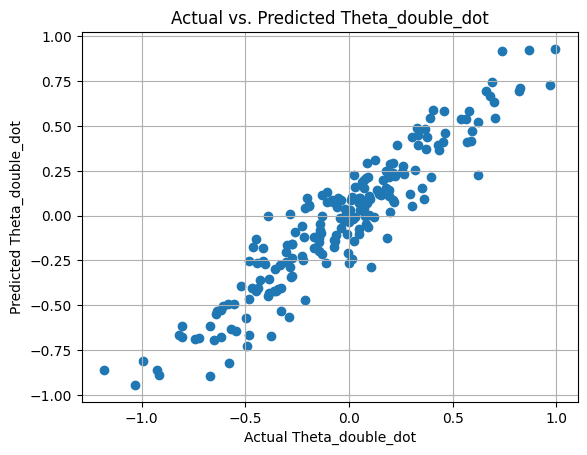

In [22]:
ridge2 = Ridge(alpha=best_alpha)
ridge2.fit(X_train3, y_train3)

y_pred3 = ridge2.predict(X_test3)


mse = mean_squared_error(y_test3, y_pred3)

print(ridge2.coef_)
print(f"Mean Squared Error (MSE): {mse}")

plt.scatter(y_test3, y_pred3)
plt.xlabel('Actual Theta_double_dot')
plt.ylabel('Predicted Theta_double_dot')
plt.title('Actual vs. Predicted Theta_double_dot')
plt.grid(True)

plt.show()

$$
\ddot{\theta} = -0.91630447 {\theta}
$$